Loading The Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("train-perceptron.txt",header=None,delimiter=' ',names=['x1','x2','class'])


In [ ]:
df

,x1,x2,class
0,1,1.0,1
1,1,-1.0,1
2,2,2.5,2
3,0,2.0,2
4,2,3.0,2
5,4,5.0,1


Dividing the dataset based on class

In [ ]:
df_class1=df.query('`class` == 1')
df_class2=df.query('`class` == 2')

In [ ]:
df_class1

,x1,x2,class
0,1,1.0,1
1,1,-1.0,1
5,4,5.0,1


In [ ]:
df_class2

,x1,x2,class
2,2,2.5,2
3,0,2.0,2
4,2,3.0,2


Plotting The Two Class Points

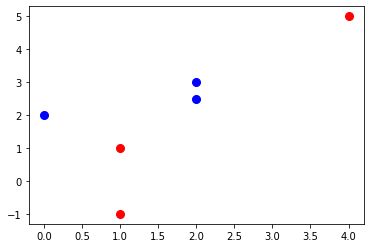

In [ ]:
plt.plot(df_class1['x1'], df_class1['x2'],'o',color='red',ms=8)
plt.plot(df_class2['x1'], df_class2['x2'],'o',color='blue',ms=8)
plt.show()

Checking The points are linearly seperable.
It is clearly seen the classes can not be seperated by linear decision boundary


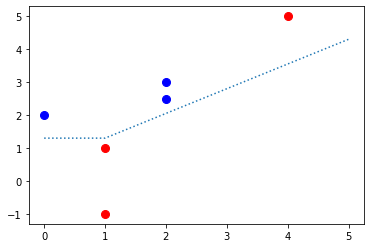

In [ ]:
plt.plot(df_class1['x1'], df_class1['x2'],'o',color='red',ms=8)
plt.plot(df_class2['x1'], df_class2['x2'],'o',color='blue',ms=8)
plt.plot(df_class1['x1']+.3, ls = ':')
plt.show()

Taking High Order Dimension and normalizing the second class by negating

In [ ]:
df_class1["x1^2"]=df_class1["x1"]**2
df_class1["x2^2"]=df_class1["x2"]**2
df_class1["x1*x2"]=df_class1["x1"]*df_class1["x2"]
df_class1["1"]=1
df_class1=df_class1[['x1^2','x2^2','x1*x2','x1','x2','1','class']]
df_class1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,x1^2,x2^2,x1*x2,x1,x2,1,class
0,1,1.0,1.0,1,1.0,1,1
1,1,1.0,-1.0,1,-1.0,1,1
5,16,25.0,20.0,4,5.0,1,1


In [ ]:
df_class2["x1^2"]=df_class2["x1"]**2*-1
df_class2["x2^2"]=df_class2["x2"]**2*-1
df_class2["x1*x2"]=df_class2["x1"]*df_class2["x2"]*-1
df_class2["1"]=1*-1
df_class2["x1"]*=-1
df_class2["x2"]*=-1
df_class2=df_class2[['x1^2','x2^2','x1*x2','x1','x2','1','class']]
df_class2

,x1^2,x2^2,x1*x2,x1,x2,1,class
2,-4,-6.25,-5.0,-2,-2.5,-1,2
3,0,-4.00,-0.0,0,-2.0,-1,2
4,-4,-9.00,-6.0,-2,-3.0,-1,2


Concating Both Classes

In [ ]:
df = pd.concat([df_class1, df_class2], axis=0)
df

,x1^2,x2^2,x1*x2,x1,x2,1,class
0,1,1.00,1.0,1,1.0,1,1
1,1,1.00,-1.0,1,-1.0,1,1
5,16,25.00,20.0,4,5.0,1,1
2,-4,-6.25,-5.0,-2,-2.5,-1,2
3,0,-4.00,-0.0,0,-2.0,-1,2
4,-4,-9.00,-6.0,-2,-3.0,-1,2


In [ ]:
df_numpy = df.to_numpy()

# Performing Perceptron

# **One At A Time **

All One

In [ ]:
from numpy import arange
O_l_one=[]
O_iter_one=[]
for i in arange(0.1,1.1,.1):
  l_rate=i
  i_weight_vector=np.array([1,1,1,1,1,1])
  postiveCount=-1
  iterations=0
  while postiveCount!=0:
    postiveCount=0
    for index,values in enumerate(df_numpy):
      result= np.dot(i_weight_vector,values[0:-1])  
      if(result<=0):
        i_weight_vector = i_weight_vector + l_rate*values[0:-1]
        postiveCount=postiveCount+1
    iterations=iterations+1
  print("Learning Rate",'%.2f'%l_rate,"- Weight Vector: ",i_weight_vector,"- Iteration",iterations)
  O_l_one.append(l_rate)
  O_iter_one.append(iterations)


Learning Rate 0.10 - Weight Vector:  [ 1.    -1.025  0.7    0.2   -0.75   0.1  ] - Iteration 6
Learning Rate 0.20 - Weight Vector:  [10.  -6.7  4.4 -1.2 -9.4  3.2] - Iteration 92
Learning Rate 0.30 - Weight Vector:  [ 16.3 -10.7   6.7  -2.3 -15.2   5.5] - Iteration 104
Learning Rate 0.40 - Weight Vector:  [ 22.2 -14.3   9.8  -2.6 -20.4   7.4] - Iteration 106
Learning Rate 0.50 - Weight Vector:  [ 25.   -16.75  11.    -3.   -23.5    8.  ] - Iteration 93
Learning Rate 0.60 - Weight Vector:  [ 29.2 -18.5  12.4  -4.4 -27.8   9.4] - Iteration 93
Learning Rate 0.70 - Weight Vector:  [ 38.8   -25.075  17.1    -4.6   -35.75   12.9  ] - Iteration 108
Learning Rate 0.80 - Weight Vector:  [ 45.8 -31.2  19.4  -5.4 -42.6  16.2] - Iteration 114
Learning Rate 0.90 - Weight Vector:  [ 45.1  -30.05  19.9   -5.3  -42.2   14.5 ] - Iteration 94
Learning Rate 1.00 - Weight Vector:  [ 50.  -33.5  22.   -6.  -47.   16. ] - Iteration 94


All Zero

In [ ]:
from numpy import arange
O_l_Zero=[]
O_iter_Zero=[]
for i in arange(0.1,1.1,.1):
  l_rate=i
  i_weight_vector=np.array([0,0,0,0,0,0])
  postiveCount=-1
  iterations=0
  while postiveCount!=0:
    postiveCount=0
    for index,values in enumerate(df_numpy):
      result= np.dot(i_weight_vector,values[0:-1])  
      if(result<=0):
        i_weight_vector = i_weight_vector + l_rate*values[0:-1]
        postiveCount=postiveCount+1
    iterations=iterations+1
  print("Learning Rate",'%.2f'%l_rate,"- Weight Vector: ",i_weight_vector,"- Iteration",iterations)
  O_l_Zero.append(l_rate)
  O_l_Zero.append(iterations)

Learning Rate 0.10 - Weight Vector:  [ 5.   -3.35  2.2  -0.6  -4.7   1.6 ] - Iteration 94
Learning Rate 0.20 - Weight Vector:  [10.  -6.7  4.4 -1.2 -9.4  3.2] - Iteration 94
Learning Rate 0.30 - Weight Vector:  [ 15.   -10.05   6.6   -1.8  -14.1    4.8 ] - Iteration 94
Learning Rate 0.40 - Weight Vector:  [ 20.  -13.4   8.8  -2.4 -18.8   6.4] - Iteration 94
Learning Rate 0.50 - Weight Vector:  [ 25.   -16.75  11.    -3.   -23.5    8.  ] - Iteration 94
Learning Rate 0.60 - Weight Vector:  [ 30.  -20.1  13.2  -3.6 -28.2   9.6] - Iteration 94
Learning Rate 0.70 - Weight Vector:  [ 35.   -23.45  15.4   -4.2  -32.9   11.2 ] - Iteration 94
Learning Rate 0.80 - Weight Vector:  [ 40.  -26.8  17.6  -4.8 -37.6  12.8] - Iteration 94
Learning Rate 0.90 - Weight Vector:  [ 45.   -30.15  19.8   -5.4  -42.3   14.4 ] - Iteration 94
Learning Rate 1.00 - Weight Vector:  [ 50.  -33.5  22.   -6.  -47.   16. ] - Iteration 94


Random

In [ ]:
from numpy import arange

for i in arange(0.1,1.1,.1):
  l_rate=i
  rng = np.random.default_rng(seed=10)
  i_weight_vector=rng.random((6))
  postiveCount=-1
  iterations=0
  while postiveCount!=0:
    postiveCount=0
    for index,values in enumerate(df_numpy):
      result= np.dot(i_weight_vector,values[0:-1])  
      if(result<=0):
        i_weight_vector = i_weight_vector + l_rate*values[0:-1]
        postiveCount=postiveCount+1
    iterations=iterations+1
  print("Learning Rate",'%.2f'%l_rate,"- Weight Vector: ",i_weight_vector,"- Iteration",iterations)


Learning Rate 0.10 - Weight Vector:  [ 5.35600171 -3.44231819  2.02844489 -0.85071788 -4.48719538  1.6359196 ] - Iteration 94
Learning Rate 0.20 - Weight Vector:  [10.15600171 -6.29231819  4.42844489 -1.45071788 -9.28719538  2.5359196 ] - Iteration 86
Learning Rate 0.30 - Weight Vector:  [ 15.35600171  -9.24231819   6.22844489  -2.25071788 -14.18719538
   4.6359196 ] - Iteration 92
Learning Rate 0.40 - Weight Vector:  [ 20.95600171 -13.59231819   8.82844489  -3.05071788 -19.08719538
   6.9359196 ] - Iteration 101
Learning Rate 0.50 - Weight Vector:  [ 25.95600171 -17.04231819  10.82844489  -3.85071788 -23.98719538
   8.6359196 ] - Iteration 100
Learning Rate 0.60 - Weight Vector:  [ 30.95600171 -20.49231819  12.82844489  -4.65071788 -28.88719538
  10.3359196 ] - Iteration 100
Learning Rate 0.70 - Weight Vector:  [ 39.45600171 -25.86731819  16.22844489  -6.15071788 -36.93719538
  13.4359196 ] - Iteration 113
Learning Rate 0.80 - Weight Vector:  [ 45.75600171 -28.79231819  19.22844489  -

# Multiple at a Time

All One

In [ ]:
from numpy import arange
M_l_one=[]
M_iter_one=[]
for i in arange(0.1,1.1,.1):
  l_rate=i
  i_weight_vector=np.array([1,1,1,1,1,1])
  
  misClasses=[-1,-1]
  sum=0
  iterations=0
  while len(misClasses)!=0:
    misClasses=[]
    for index,values in enumerate(df_numpy):
      result= np.dot(i_weight_vector,values[0:-1])  
      if(result<=0):
        misClasses.append(index)
    for classes in misClasses:
        sum=sum + df_numpy[classes][0:-1]
    i_weight_vector = i_weight_vector + l_rate*sum
    iterations=iterations+1
  print("Learning Rate",'%.2f'%l_rate,"- Weight Vector: ",i_weight_vector,"- Iteration",iterations)
  M_l_one.append(l_rate)
  M_iter_one.append(iterations) 

Learning Rate 0.10 - Weight Vector:  [ 252.3 -144.2   87.7  -19.7 -207.7   56.7] - Iteration 84
Learning Rate 0.20 - Weight Vector:  [ 358.2 -247.6  137.4   22.2 -318.2   68.6] - Iteration 68
Learning Rate 0.30 - Weight Vector:  [ 937.9  -633.05  362.5    18.7  -802.7   180.4 ] - Iteration 92
Learning Rate 0.40 - Weight Vector:  [ 1267.8  -905.8   469.4    37.4 -1089.8   270.2] - Iteration 94
Learning Rate 0.50 - Weight Vector:  [1082.   -785.25  468.     27.   -906.5   178.  ] - Iteration 74
Learning Rate 0.60 - Weight Vector:  [ 1283.2   -904.25   566.2     22.   -1076.9    191.8 ] - Iteration 73
Learning Rate 0.70 - Weight Vector:  [ 1497.6   -1054.425   659.7      26.2   -1257.25    224.3  ] - Iteration 73
Learning Rate 0.80 - Weight Vector:  [ 1418.6 -1072.    595.4    81.  -1195.4   258.6] - Iteration 67
Learning Rate 0.90 - Weight Vector:  [ 1595.8   -1206.125   669.7      91.    -1344.95    290.8  ] - Iteration 67
Learning Rate 1.00 - Weight Vector:  [ 1773.   -1340.25   744.  

All Zero

In [ ]:
from numpy import arange

for i in arange(0.1,1.1,.1):
  l_rate=i
  i_weight_vector=np.array([0,0,0,0,0,0])

  misClasses=[-1,-1]
  sum=0
  iterations=0
  while len(misClasses)!=0:
    misClasses=[]
    for index,values in enumerate(df_numpy):
      result= np.dot(i_weight_vector,values[0:-1])  
      if(result<=0):
        misClasses.append(index)
    for classes in misClasses:
        sum=sum + df_numpy[classes][0:-1]
    i_weight_vector = i_weight_vector + l_rate*sum
    iterations=iterations+1
  print("Learning Rate",'%.2f'%l_rate,"- Weight Vector: ",i_weight_vector,"- Iteration",iterations)


Learning Rate 0.10 - Weight Vector:  [ 147.6 -102.8   49.4    2.  -122.2   34.1] - Iteration 61
Learning Rate 0.20 - Weight Vector:  [ 295.2 -205.6   98.8    4.  -244.4   68.2] - Iteration 61
Learning Rate 0.30 - Weight Vector:  [ 442.8 -308.4  148.2    6.  -366.6  102.3] - Iteration 61
Learning Rate 0.40 - Weight Vector:  [ 590.4 -411.2  197.6    8.  -488.8  136.4] - Iteration 61
Learning Rate 0.50 - Weight Vector:  [ 738.  -514.   247.    10.  -611.   170.5] - Iteration 61
Learning Rate 0.60 - Weight Vector:  [ 885.6 -616.8  296.4   12.  -733.2  204.6] - Iteration 61
Learning Rate 0.70 - Weight Vector:  [1033.2 -719.6  345.8   14.  -855.4  238.7] - Iteration 61
Learning Rate 0.80 - Weight Vector:  [1180.8 -822.4  395.2   16.  -977.6  272.8] - Iteration 61
Learning Rate 0.90 - Weight Vector:  [ 1328.4  -925.2   444.6    18.  -1099.8   306.9] - Iteration 61
Learning Rate 1.00 - Weight Vector:  [ 1476. -1028.   494.    20. -1222.   341.] - Iteration 61


Random

In [ ]:
from numpy import arange
rng = np.random.default_rng(seed=10)
i_weight_vector=rng.random((6))
print(i_weight_vector)
for i in arange(0.1,1.1,.1):
  l_rate=i
  misClasses=[-1,-1]
  sum=0
  iterations=0
  while len(misClasses)!=0:
    misClasses=[]
    for index,values in enumerate(df_numpy):
      result= np.dot(i_weight_vector,values[0:-1])  
      if(result<=0):
        misClasses.append(index)
    for classes in misClasses:
        sum=sum + df_numpy[classes][0:-1]
    i_weight_vector = i_weight_vector + l_rate*sum
    iterations=iterations+1
  print("Learning Rate",'%.2f'%l_rate,"- Weight Vector: ",i_weight_vector,"- Iteration",iterations)


[0.95600171 0.20768181 0.82844489 0.14928212 0.51280462 0.1359196 ]
Learning Rate 0.10 - Weight Vector:  [ 156.85600171  -90.01731819   47.62844489  -12.55071788 -142.83719538
   40.0359196 ] - Iteration 71
Learning Rate 0.20 - Weight Vector:  [ 157.25600171  -89.61731819   48.02844489  -12.15071788 -142.43719538
   40.4359196 ] - Iteration 2
Learning Rate 0.30 - Weight Vector:  [ 157.25600171  -89.61731819   48.02844489  -12.15071788 -142.43719538
   40.4359196 ] - Iteration 1
Learning Rate 0.40 - Weight Vector:  [ 157.25600171  -89.61731819   48.02844489  -12.15071788 -142.43719538
   40.4359196 ] - Iteration 1
Learning Rate 0.50 - Weight Vector:  [ 157.25600171  -89.61731819   48.02844489  -12.15071788 -142.43719538
   40.4359196 ] - Iteration 1
Learning Rate 0.60 - Weight Vector:  [ 157.25600171  -89.61731819   48.02844489  -12.15071788 -142.43719538
   40.4359196 ] - Iteration 1
Learning Rate 0.70 - Weight Vector:  [ 157.25600171  -89.61731819   48.02844489  -12.15071788 -142.4371

Table 

In [ ]:
from prettytable import PrettyTable 
myTable = PrettyTable(["Learning Rate", "One at a time","Many At A Time"]) 
  
for f, b,c in zip(M_l_one,O_iter_one, M_iter_one):
  myTable.add_row(['%.2f'%f,b,c]) 
print(myTable)

+---------------+---------------+----------------+
| Learning Rate | One at a time | Many At A Time |
+---------------+---------------+----------------+
|      0.10     |       6       |       84       |
|      0.20     |       92      |       68       |
|      0.30     |      104      |       92       |
|      0.40     |      106      |       94       |
|      0.50     |       93      |       74       |
|      0.60     |       93      |       73       |
|      0.70     |      108      |       73       |
|      0.80     |      114      |       67       |
|      0.90     |       94      |       67       |
|      1.00     |       94      |       67       |
+---------------+---------------+----------------+


Plotting The Bar Chart

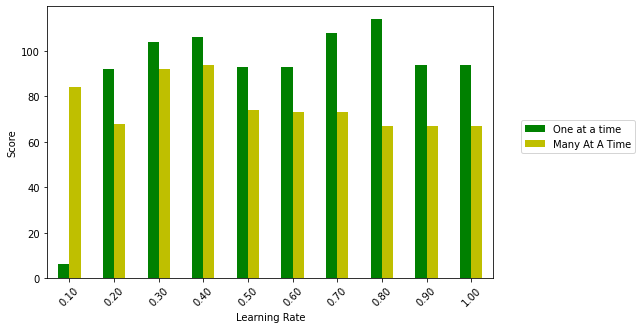

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

index = np.arange(5)
bar_width = 0.35
for i in range(0,len(M_l_one)):
    M_l_one[i]='%.2f'%M_l_one[i]
data={'One at a time':O_iter_one,'Many At A Time':M_iter_one,'Learning Rate':M_l_one}
df = pd.DataFrame(data)

ax = df[["Learning Rate","One at a time", "Many At A Time"]].plot(x='Learning Rate', 
                                                      kind='bar', 
                                                      color=["g","y"],
                                                      rot=45,figsize=(8,5))
ax.set_ylabel('Score')
ax.legend(["One at a time", "Many At A Time"],bbox_to_anchor = (1.05, 0.6));


Ques-a (ans): We have taken high order dimension because the data points are not linearly seperable so we had to take higher dimension to seperate them.